# Задание 1: Применение метода главных компонент (PCA).

Используйте набор данных "Iris" из sklearn.datasets. Примените PCA, чтобы 
снизить размерность до 2-х и визуализируйте результаты.

Загрузим набор данных Iris, включая представление в виде Dataframe из Pandas.

In [167]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

iris.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Зададим имена классов в dataframe вместо их численных обозначений

In [168]:
iris.frame["target"] = iris.target_names[iris.target]

Стандартизируем данные

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

Применим PCA из библиотеки sklearn

In [170]:
from sklearn.decomposition import PCA

iris_reduced = PCA(n_components=2).fit_transform(iris_scaled)

Отобразим полученные результаты с помощью matplotlib

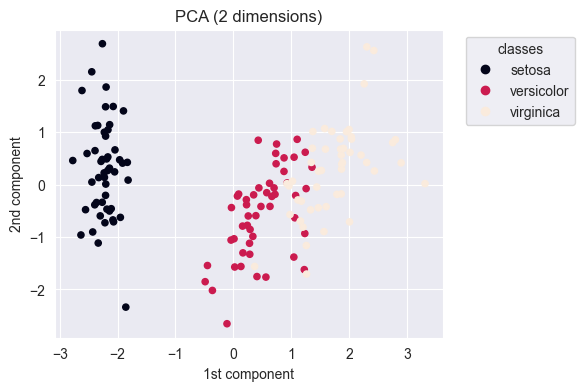

In [171]:
from matplotlib.axes import Axes
from matplotlib.collections import PathCollection
import matplotlib.pyplot as plt

iris_scatter: PathCollection = plt.scatter(iris_reduced[:, 0], iris_reduced[:, 1], s=20, c=iris.target)
iris_axes: Axes = iris_scatter.axes
iris_axes.figure.set_size_inches(5,4)
iris_axes.set(
    title="PCA (2 dimensions)",
    xlabel='1st component',
    ylabel='2nd component',
)
iris_axes.legend(
    iris_scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right", 
    title="classes",
    bbox_to_anchor=(1.36, 1)
)

plt.show()

# Задание 2: Сравнение PCA и Factor Analysis.

Используйте набор данных "Wine" из sklearn.datasets. Примените PCA и 
Factor Analysis, чтобы снизить размерность до 2-х и визуализируйте различия 
в результатах.

Загрузим набор данных Wine, включая представление в виде Dataframe из Pandas.

In [172]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

Стандартизируем данные

In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine.data)

Применим FactorAnalysis из библиотеки sklearn

In [174]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
wine_fa = fa.fit_transform(wine_scaled)

Применим PCA из библиотеки sklearn

In [175]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_scaled)

[Дополнительно] Визуализируем выборочные две компоненты новых базисных векторов в исходных координатах (стандартизированных), полученных через оба метода. Компоненты выбраны основываясь на наглядности кластеризации по ним.

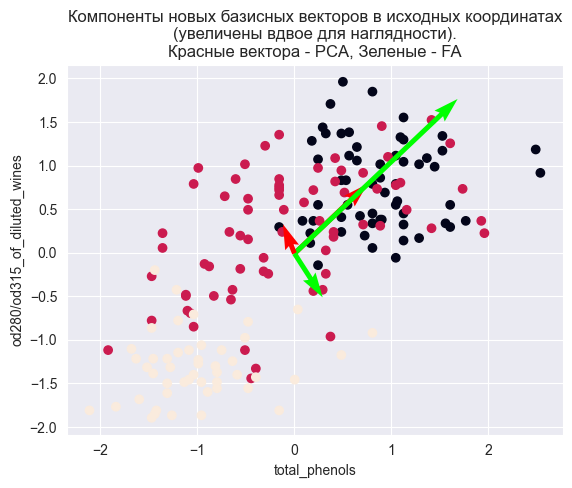

In [176]:
import numpy as np

remaining_columns = [0, 11]
X_selected = wine_scaled[:, remaining_columns]

vector_fig, vector_axes = plt.subplots(1, 1)

vector_scatter = vector_axes.scatter(x=X_selected[:, 0], y=X_selected[:, 1], c=wine.target)
vector_axes.set_title("Компоненты новых базисных векторов в исходных координатах\n(увеличены вдвое для наглядности).\n"
                      "Красные вектора - PCA, Зеленые - FA")
vector_axes.set_xlabel(wine.frame.columns[remaining_columns[0]])
vector_axes.set_ylabel(wine.frame.columns[remaining_columns[1]])

origin = np.mean(X_selected, axis=0) 
for i in range(2):
    plt.quiver(*origin, *pca.components_[i, remaining_columns] * 2, 
               scale=1, scale_units='xy', color='#FF0000', width=0.01)
    plt.quiver(*origin, *fa.components_[i, remaining_columns] * 2, 
               scale=1, scale_units='xy', color='#00FF00', width=0.01)

plt.show()


Визуализируем результаты обоих алгоритмов PCA и FA

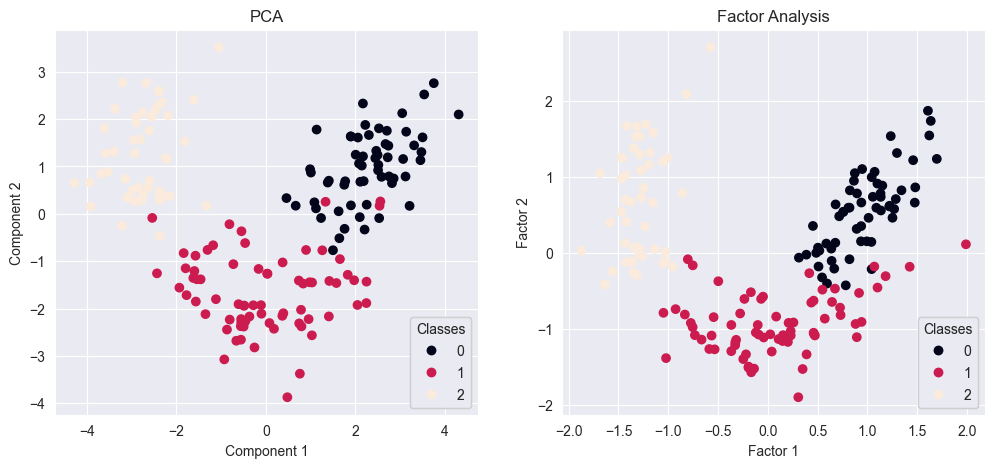

In [177]:
wine_fig, wine_axes = plt.subplots(1, 2, figsize=(12, 5))

wine_scatter = wine_axes[0].scatter(wine_pca[:, 0], wine_pca[:, 1] * (-1), c=wine.target)
wine_axes[0].set_title("PCA")
wine_axes[0].set_xlabel("Component 1")
wine_axes[0].set_ylabel("Component 2")
legend1 = wine_axes[0].legend(*wine_scatter.legend_elements(), title="Classes", loc="lower right")
wine_axes[0].add_artist(legend1)

wine_scatter = wine_axes[1].scatter(wine_fa[:, 0], wine_fa[:, 1], c=wine.target)
wine_axes[1].set_title("Factor Analysis")
wine_axes[1].set_xlabel("Factor 1")
wine_axes[1].set_ylabel("Factor 2")
legend2 = wine_axes[1].legend(*wine_scatter.legend_elements(), title="Classes", loc="lower right")
wine_axes[1].add_artist(legend2)

plt.show()

# Задание 3: Исследование влияния предобработки данных на результаты PCA.

Используйте набор данных "Boston Housing" из sklearn.datasets. Примените 
различные методы предобработки (например, масштабирование, 
нормализацию) перед применением PCA и сравните полученные результаты.

Датасет Boston Housing был вырезан из scikit-learn в версии 1.2 из-за этических проблем.
Взамен будем использовать альтернативный датасет California Housing.

Загрузим датасет

In [178]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california_housing = fetch_california_housing(as_frame=True)
housing_df = pd.DataFrame(california_housing.data,columns=california_housing.feature_names)
housing_df['MedHouseVal'] = pd.DataFrame(california_housing.target)

Применим разные методы препроцессинга для дальнейшего применения PCA:
- Стандартизация
- Нормализация
- Отброс кореллирующих признаков

Применим нормализацию

In [179]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(housing_df), columns=housing_df.columns)
df_normalized['MedHouseVal'] = housing_df['MedHouseVal']

df_normalized.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422


Применим стандартизацию

In [180]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(housing_df), columns=housing_df.columns)
df_standardized['MedHouseVal'] = housing_df['MedHouseVal']

df_standardized.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


Отбросим коррелированные признаки. Для этого построим матрицу корелляции и выберем наиболее кореллирующие признаки.

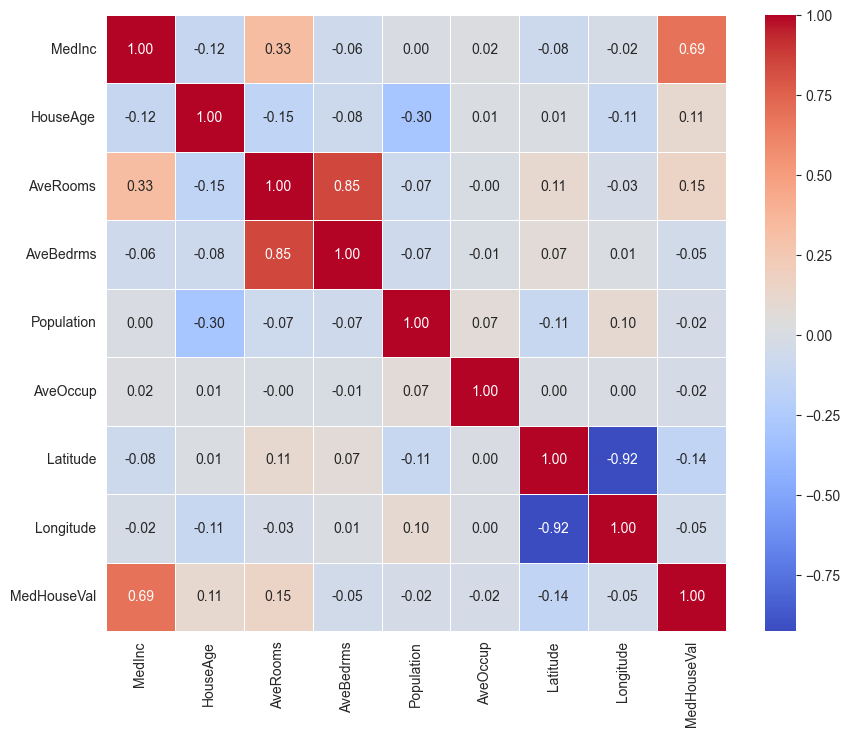

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,-122.25,3.422


In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(housing_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

to_drop = ['Latitude']
df_cleared_correlation = housing_df.drop(to_drop, axis=1)

df_cleared_correlation.head()

Матрица показывает, что коррелирует пара <Широта - долгота>.
Корелляция широты и долготы обусловлена географическими особенностями (Калифорния расположена по диагонали сетки координат), поэтому один из признаков можно отбросить.

Выполним PCA для всех обработанных датасетов

In [182]:
import pandas as pd
from sklearn.decomposition import PCA

def perform_pca(n, array: list) -> list:
    result = []
    pca = PCA(n_components=n)
    
    for x in array:
        pca1 = pca.fit_transform(x.drop('MedHouseVal',axis=1))
        housing_pca = pd.DataFrame(pca1,columns=[f'PCA{i}' for i in range(n)])
        housing_pca['MedHouseVal'] = x['MedHouseVal']
        result.append(housing_pca)
        
    return result

Построим линейную регрессию для предсказания цен домов и оценки модели, полученной с PCA. Разобъем датасет на выборку для обучения и тестовую.

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

test_cases = {}
test_component_count = [3, 5, 7]

for count in test_component_count:
    pcas = perform_pca(count, [housing_df, df_standardized, df_normalized, df_cleared_correlation])
    
    test_cases[count] = []
    for pca in zip(pcas, ['not processed', "standardized", "normalized", "cleared correlation"]):
        test_cases[count].append(pca)

regression_sets = {}
target = 'MedHouseVal'
for count in test_component_count:
    regression_sets[count] = []
    for pca in test_cases[count]:
        df = pca[0]
        name = pca[1]
        split = (train_test_split(df.drop(target, axis=1),  df[target], test_size=0.2), name)
        regression_sets[count].append(split)

Проверим метрики на тестовых выборках при разных количествах компонент PCA

In [184]:
import numpy as np

for test_case in regression_sets.items():
    print(f"{test_case[0]} components PCA")
    sets = test_case[1]
    
    for set in sets:
        name = set[1]
        set = set[0]
        
        lr = LinearRegression()
        lr.fit(set[0], set[2])
        y_pred = lr.predict(set[0])
        r2 = r2_score(set[2],y_pred)
        rmse = np.sqrt(mean_squared_error(set[2],y_pred))
        # print('Train: R2 Score : {} | RMSE : {} ({})'.format(r2, rmse, name))
        
        lr.fit(set[1], set[3])
        y_pred = lr.predict(set[1])
        r2 = r2_score(set[3],y_pred)
        rmse = np.sqrt(mean_squared_error(set[3],y_pred))
        print('Test:  R2 Score : {} | RMSE : {} ({})'.format(r2, rmse, name))

3 components PCA
Test:  R2 Score : 0.01000383602280508 | RMSE : 1.159397219500795 (not processed)
Test:  R2 Score : 0.029082132314622755 | RMSE : 1.14311215848115 (standardized)
Test:  R2 Score : 0.5238763482017906 | RMSE : 0.7901543032832268 (normalized)
Test:  R2 Score : 0.014301594342000956 | RMSE : 1.1557730967362048 (cleared correlation)
5 components PCA
Test:  R2 Score : 0.12442332489128682 | RMSE : 1.084943277108735 (not processed)
Test:  R2 Score : 0.44145641590490425 | RMSE : 0.8561226745484241 (standardized)
Test:  R2 Score : 0.6031786979796383 | RMSE : 0.7408074395980527 (normalized)
Test:  R2 Score : 0.16250183000634055 | RMSE : 1.055455928265062 (cleared correlation)
7 components PCA
Test:  R2 Score : 0.6260382064591961 | RMSE : 0.7059605548028611 (not processed)
Test:  R2 Score : 0.6024605798937877 | RMSE : 0.7234836458034484 (standardized)
Test:  R2 Score : 0.6327629070254059 | RMSE : 0.7000946502163694 (normalized)
Test:  R2 Score : 0.5727189211665199 | RMSE : 0.7377995

# Задание 4: Применение Disciminant Analysis.

Используйте набор данных "Iris" из sklearn.datasets. Примените Linear 
Discriminant Analysis (LDA) и Quadratic Discriminant Analysis (QDA), чтобы 
снизить размерность до 2-х и визуализируйте результаты.

In [185]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [186]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Разобъем выборку на тестовую и обучающую

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

Применим LDA

In [188]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)
y_lda_pred = lda.predict(X_test)

Применим QDA

In [189]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_qda_pred = qda.predict(X_test)

Оценим качество алгоритмов

In [190]:
from sklearn.metrics import accuracy_score, classification_report

lda_accuracy = accuracy_score(y_test, y_lda_pred)
lda_report = classification_report(y_test, y_lda_pred)
print("LDA Accuracy:", lda_accuracy)
print("LDA Classification Report:\n", lda_report)

qda_accuracy = accuracy_score(y_test, y_qda_pred)
qda_report = classification_report(y_test, y_qda_pred)
print("QDA Accuracy:", qda_accuracy)
print("QDA Classification Report:\n", qda_report)

LDA Accuracy: 0.9777777777777777
LDA Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

QDA Accuracy: 0.9777777777777777
QDA Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


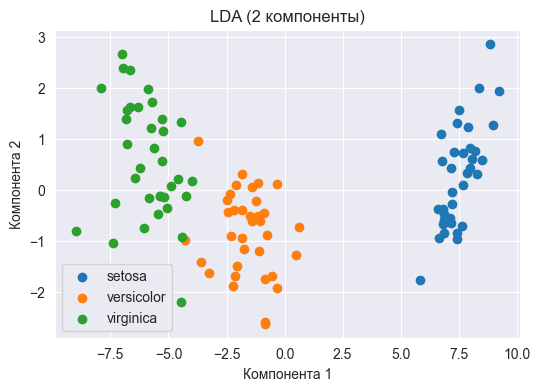

In [191]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.subplot(1, 1, 1)
for i, label in enumerate(iris.target_names):
    plt.scatter(X_lda[y_train == i, 0], X_lda[y_train == i, 1], label=label)
plt.title("LDA (2 компоненты)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.legend()

# Отображение графиков
plt.show()


# Задание 5: Сравнение PCA и LDA.

Используйте любой набор данных с классифицирующей моделью. 
Примените PCA и LDA и сравните, как влияют эти методы снижения 
размерности на эффективность классификации.

Загрузка датасета и стандартизация, разбиение на обучающую и тестовую выборки

In [192]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

Применение PCA и LDA

In [193]:
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.transform(X_test)

In [194]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Обучение модели SVM на PCA-преобразованных данных
svm_pca = SVC()
svm_pca.fit(X_pca_train, y_train)
y_pca_pred = svm_pca.predict(X_pca_test)

# Обучение модели SVM на LDA-преобразованных данных
svm_lda = SVC()
svm_lda.fit(X_lda_train, y_train)
y_lda_pred = svm_lda.predict(X_lda_test)


Оценка качества

In [195]:
pca_accuracy = accuracy_score(y_test, y_pca_pred)
lda_accuracy = accuracy_score(y_test, y_lda_pred)
print("PCA Accuracy:", pca_accuracy)
print("LDA Accuracy:", lda_accuracy)


PCA Accuracy: 0.9111111111111111
LDA Accuracy: 0.9777777777777777


Визуализация результатов

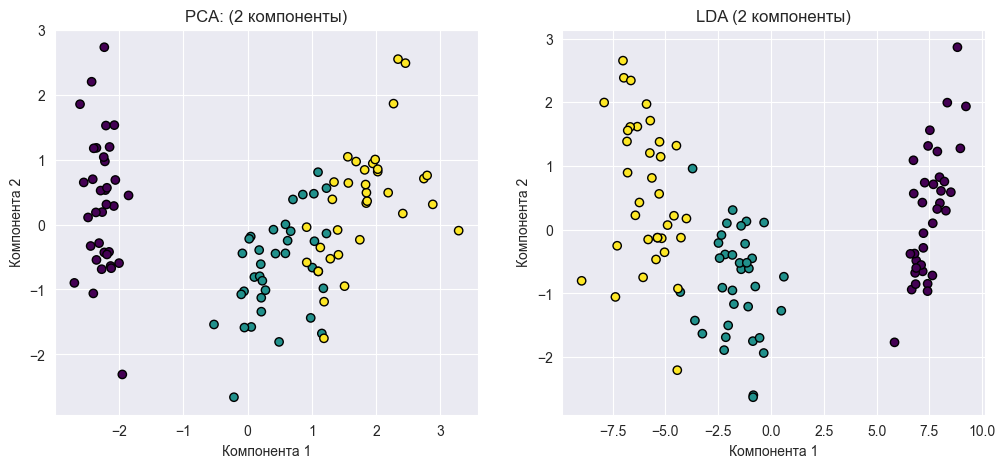

In [196]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title("PCA: (2 компоненты)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")

plt.subplot(1, 2, 2)
plt.scatter(X_lda_train[:, 0], X_lda_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title("LDA (2 компоненты)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")

plt.show()